In [110]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [43]:
df = pd.read_csv('bus1234.csv')

In [44]:
df.head()

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0


In [45]:
df.tail()

,Unnamed: 0,id,group,year,month,replace,miles
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0
8259,8259,95.0,530875.0,1985.0,5.0,0.0,347549.0


In [46]:
df.describe()

,Unnamed: 0,id,group,year,month,replace,miles
count,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000
mean,4129.500000,99.454722,278350.605932,1981.080387,6.489831,0.007264,118235.158232
std,2384.600945,27.511206,265015.917102,2.617909,3.489873,0.084924,85129.344989
min,0.000000,59.000000,50.000000,1975.000000,1.000000,0.000000,0.000000
25%,2064.750000,76.000000,203.000000,1979.000000,3.000000,0.000000,46096.000000
50%,4129.500000,94.000000,530875.000000,1981.000000,6.000000,0.000000,101118.000000
75%,6194.250000,122.000000,530875.000000,1983.000000,10.000000,0.000000,179969.000000
max,8259.000000,162.000000,530875.000000,1985.000000,12.000000,1.000000,388254.000000


In [47]:
df.isnull().sum()

Unnamed: 0    0
id            0
group         0
year          0
month         0
replace       0
miles         0
dtype: int64

In [48]:
df.shape

(8260, 7)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8260 non-null   int64  
 1   id          8260 non-null   float64
 2   group       8260 non-null   float64
 3   year        8260 non-null   float64
 4   month       8260 non-null   float64
 5   replace     8260 non-null   float64
 6   miles       8260 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 451.8 KB


Text(0.5, 1.0, 'Miles per group ')

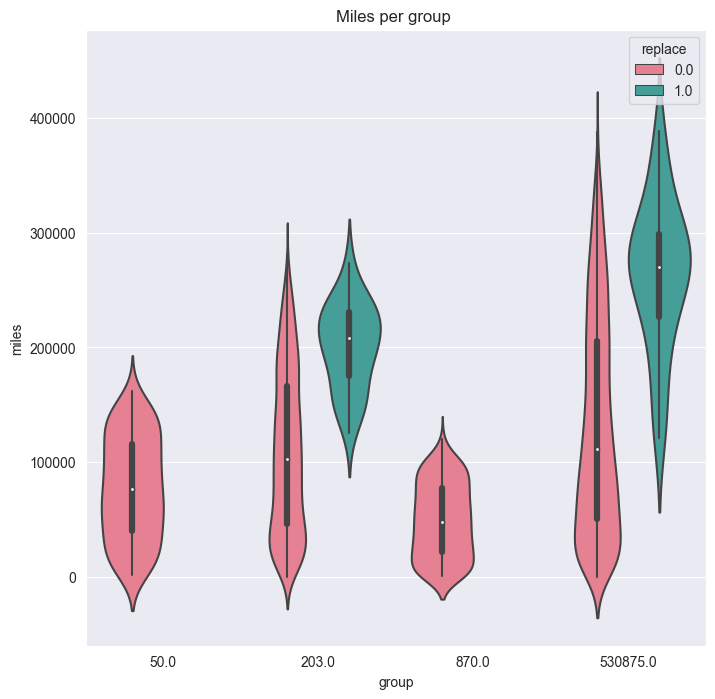

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(x=df['group'], y=df['miles'], hue=df['replace'], palette='husl')
plt.title('Miles per group ')

In [51]:
df.groupby(by='year').sum()

,Unnamed: 0,id,group,month,replace,miles
year,,,,,,
1975.0,893698,11396.0,78569500.0,1554.0,0.0,956433.0
1976.0,2684646,34188.0,235708500.0,2886.0,0.0,16563156.0
1977.0,2689974,34188.0,235708500.0,2886.0,1.0,38249247.0
1978.0,2695302,34188.0,235708500.0,2886.0,2.0,57969609.0
1979.0,3142950,62868.0,235757220.0,5286.0,4.0,78481002.0
1980.0,3772422,103020.0,235825428.0,6630.0,4.0,109203289.0
1981.0,3787126,107676.0,235827028.0,6902.0,6.0,135017661.0
1982.0,3801078,110004.0,235827828.0,6942.0,13.0,146054939.0
1983.0,4262034,128604.0,235932228.0,7962.0,9.0,154940380.0


Text(0.5, 1.0, 'Replacemnt over time ')

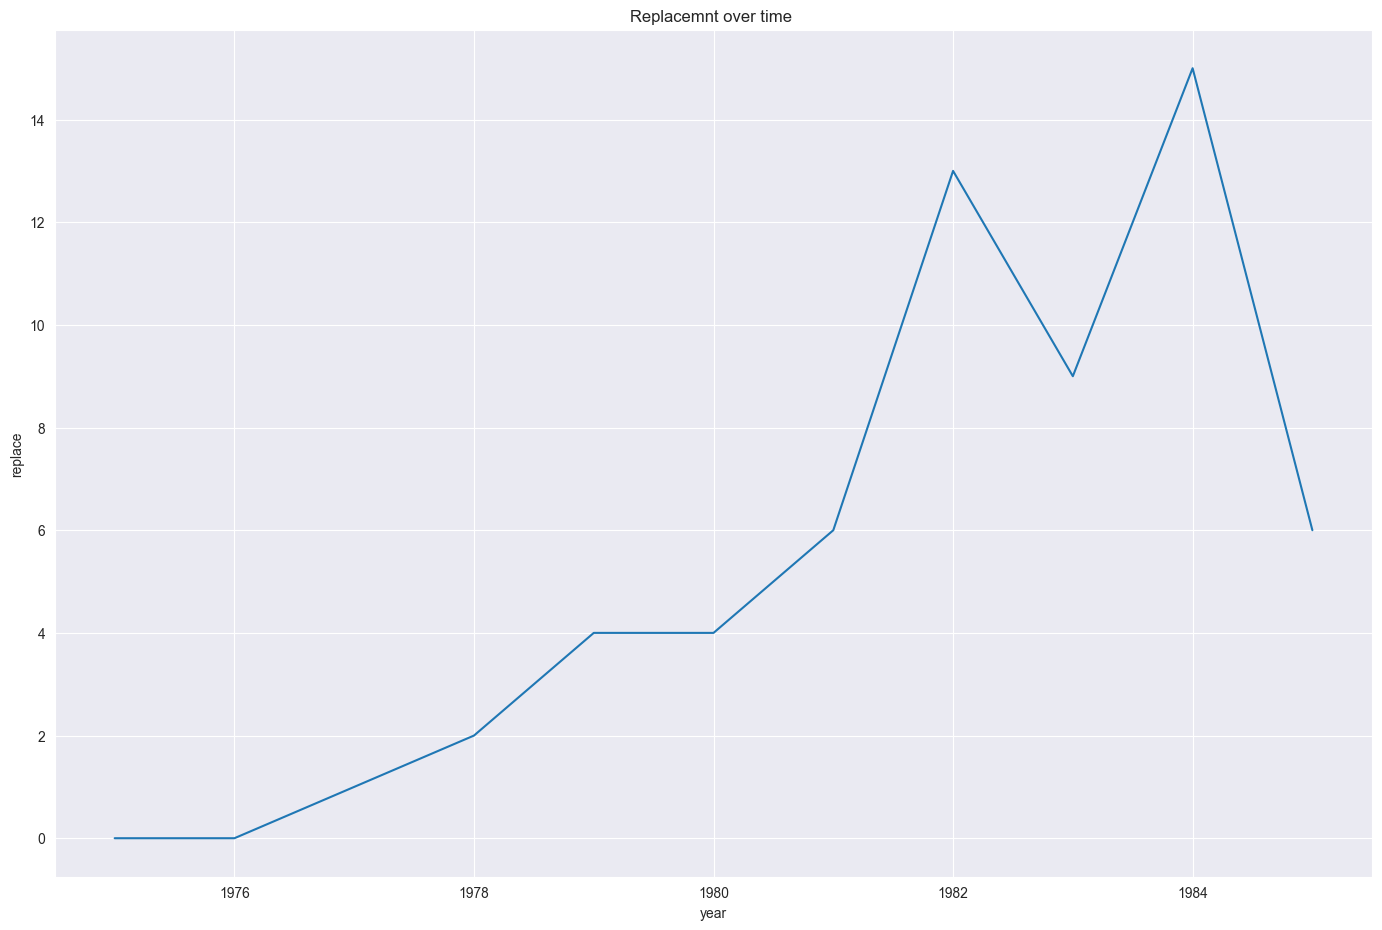

In [52]:
plt.figure(figsize=(17,11))
sns.lineplot(df.groupby(by='year').sum()['replace'])
plt.title('Replacemnt over time ')

In [53]:
df.groupby(by='month').sum()['replace']

month
1.0     7.0
2.0     6.0
3.0     5.0
4.0     7.0
5.0     2.0
6.0     5.0
7.0     4.0
8.0     4.0
9.0     4.0
10.0    5.0
11.0    4.0
12.0    7.0
Name: replace, dtype: float64

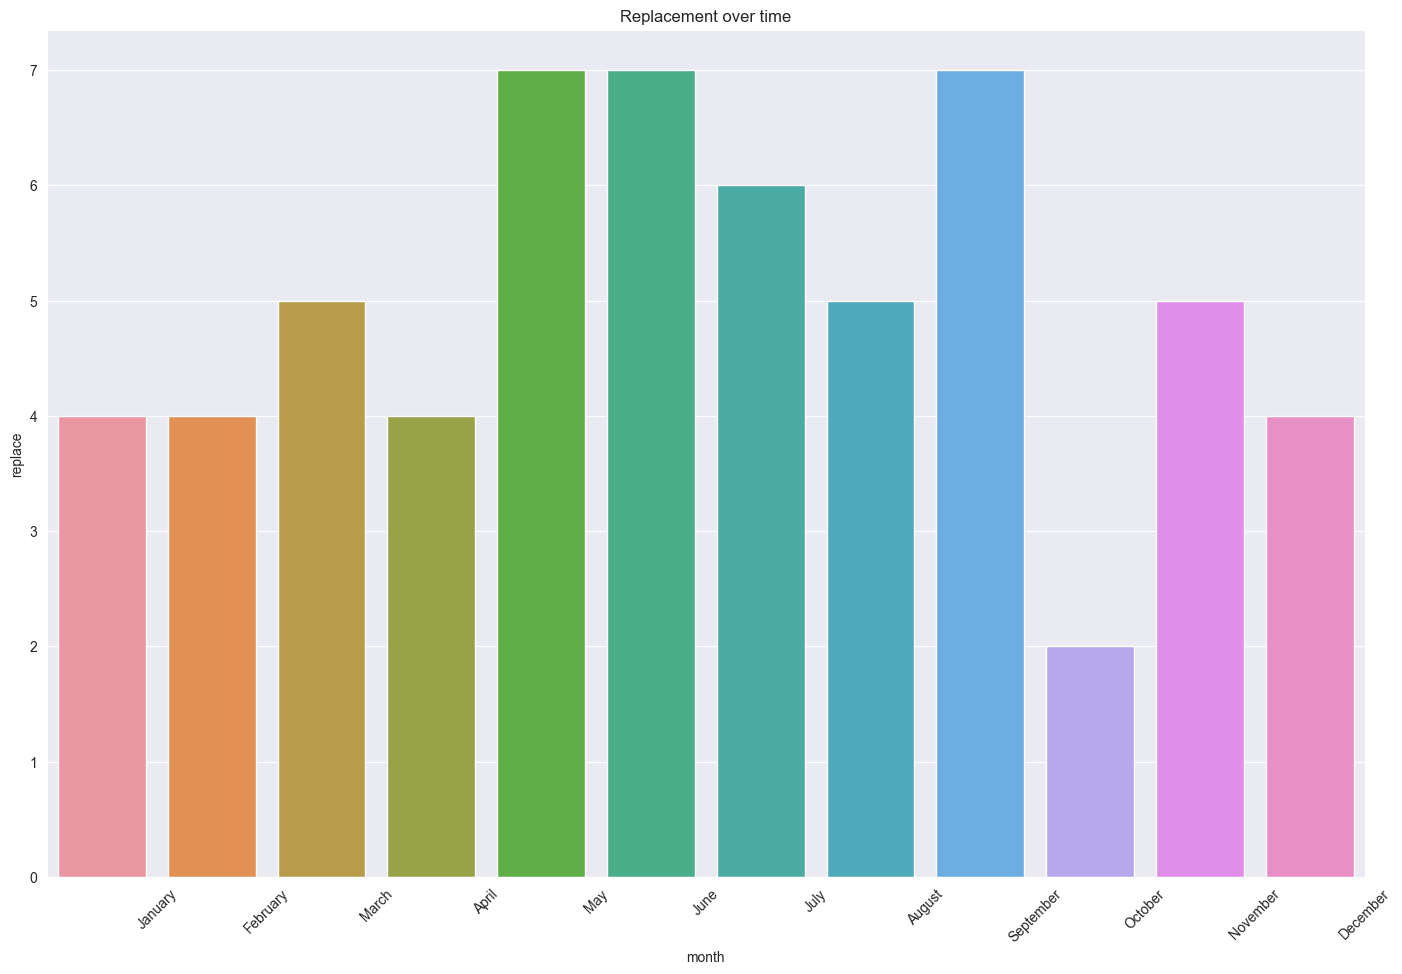

In [54]:
plt.figure(figsize=(17, 11))
sns.barplot(x=df['month'], y=df.groupby('month')['replace'].sum())
plt.xticks(ticks=np.arange(12) + 0.5,
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           rotation=45)
plt.title('Replacement over time')
plt.show()

In [55]:
# PreProcessing

In [97]:
def onehot_encode(data, column):
    data = data.copy()
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

In [103]:
def preprocess_inputs(data):
    data = data.copy()
    
    # Drop the index
    data = data.drop(['Unnamed: 0'], axis=1)
    
    # one hot encoding
    
    for column in ['id', 'group']:
        data = onehot_encode(data,column)
    
    # Split data into x and y
    y = data['replace']
    x = data.drop(['replace'], axis=1)
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=1)
    
    return x_train, x_test, y_train, y_test

In [104]:
x_train, x_test, y_train, y_test = preprocess_inputs(df)

In [105]:
x

,id,group,year,month,replace,miles
0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...
8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [106]:
x_train

,year,month,miles,id_59.0,id_60.0,id_61.0,id_62.0,id_63.0,id_64.0,id_65.0,...,id_157.0,id_158.0,id_159.0,id_160.0,id_161.0,id_162.0,group_50.0,group_203.0,group_870.0,group_530875.0
6218,1981.0,1.0,143927.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4338,1980.0,5.0,213103.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2716,1979.0,8.0,1888.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5490,1978.0,11.0,156083.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1053,1981.0,1.0,35140.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1982.0,11.0,6057.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7813,1977.0,6.0,57410.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
905,1980.0,5.0,41280.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5192,1983.0,4.0,69653.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
y_train

6218    0.0
4338    0.0
2716    0.0
5490    0.0
1053    0.0
       ... 
2895    0.0
7813    0.0
905     0.0
5192    0.0
235     0.0
Name: replace, Length: 2478, dtype: float64

In [108]:
x_train.value_counts()

year    month  miles     id_59.0  id_60.0  id_61.0  id_62.0  id_63.0  id_64.0  id_65.0  id_66.0  id_67.0  id_68.0  id_69.0  id_70.0  id_71.0  id_72.0  id_73.0  id_74.0  id_75.0  id_76.0  id_77.0  id_78.0  id_79.0  id_80.0  id_81.0  id_82.0  id_83.0  id_84.0  id_85.0  id_86.0  id_87.0  id_88.0  id_89.0  id_90.0  id_91.0  id_92.0  id_93.0  id_94.0  id_95.0  id_96.0  id_97.0  id_98.0  id_99.0  id_100.0  id_101.0  id_102.0  id_103.0  id_104.0  id_105.0  id_106.0  id_107.0  id_108.0  id_109.0  id_110.0  id_111.0  id_112.0  id_113.0  id_114.0  id_115.0  id_116.0  id_117.0  id_118.0  id_119.0  id_120.0  id_121.0  id_122.0  id_123.0  id_124.0  id_125.0  id_126.0  id_127.0  id_128.0  id_129.0  id_130.0  id_131.0  id_132.0  id_133.0  id_134.0  id_135.0  id_136.0  id_137.0  id_138.0  id_139.0  id_140.0  id_141.0  id_142.0  id_143.0  id_144.0  id_145.0  id_146.0  id_147.0  id_148.0  id_149.0  id_150.0  id_151.0  id_152.0  id_153.0  id_154.0  id_155.0  id_156.0  id_157.0  id_158.0  id_159.0  id_160

In [109]:
# Training 

In [111]:
model = LogisticRegression(
    class_weight={
        0 : 1.0
        1 : 1.0
    })
model.fit(x_train , y_train)

LogisticRegression()

In [112]:
# Result

In [115]:
print('test accuracy : {:.2f}% '.format(model.score(x_test,y_test)*100))

test accuracy : 99.31% 


In [118]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred , target_names = ['No Replacement', 'Replacement']))

                precision    recall  f1-score   support

No Replacement       0.99      1.00      1.00      5742
   Replacement       0.00      0.00      0.00        40

      accuracy                           0.99      5782
     macro avg       0.50      0.50      0.50      5782
  weighted avg       0.99      0.99      0.99      5782



C:\Users\91998\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91998\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91998\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,